In [2]:
# CS 181, Harvard University
# Spring 2016
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as c
import time
from Perceptron import Perceptron
from numpy.core.umath_tests import inner1d
from matplotlib.backends.backend_pdf import PdfPages


# Implement this class
class KernelPerceptron(Perceptron):
    def __init__(self, numsamples):
        self.numsamples = numsamples
        self.alphas =  {} #of len(x)
        self.b = 0.0
        self.SV_indices = []
        self.X = []
        self.Y = []
        self.timefit = 0.0
        self.timepredict = 0.0

    def fit(self, X, Y):
        print("\n\n========= *** Fitting Perceptron *** ==========")
        t_start = time.time()
        X = np.array(X)
        self.X = X
        self.Y = Y
        # K(x,x2 ) = x.T *  x2
        #np.random.seed(314159)
        SV_indices = set()
        alphas = {}
        
        for i in range(self.numsamples):
            t = np.random.randint(X.shape[0])
            xt = X[t]
            y_hat = np.sum(alphas[idx]*inner1d(xt,X[idx]) for idx in SV_indices)
            y_true = Y[t]
            if y_true * y_hat <= 0:
                SV_indices.add(t)
                alphas.update({t:y_true})
        self.alphas = alphas
        self.SV_indices = SV_indices
        t_elapsed = time.time() - t_start
        self.timefit = t_elapsed
        print("Elapsed time for fitting ", X.shape, " datapoints: ", t_elapsed, " seconds." )

    def predict(self, X):
        t_start = time.time()
        print("=== Predicting ===")
        #print('support vector indices', self.SV_indices)
        #print('\nalphas', self.alphas)

        y_hats = []
        for xt in X:
            boo =  [self.alphas[sv_i]*np.dot(xt,self.X[sv_i]) for sv_i in self.SV_indices] 
            y_hat = np.sum(boo)
            if y_hat == 0:
                y_hat = 1
            y_hats.append(y_hat)
        y_hats = np.array(y_hats)
        y_hats = np.sign(y_hats)

        at_elapsed = time.time() - t_start
        self.timepredict = at_elapsed
        print("Elapsed time for predicting", X.shape, " datapoints: ", at_elapsed, "seconds.")
        print("samples %d, data shape %d" % (self.numsamples, self.X.shape[0]))
        return y_hats 


# Implement this class
class BudgetKernelPerceptron(Perceptron):
    def __init__(self, beta, N, numsamples):
        self.beta = beta
        self.N = N
        self.numsamples = numsamples
        self.X = X
        self.Y = Y
        self.timefit = 0.0
        self.timepredict = 0.0


    def fit(self, X, Y):
        print("\n\n========= *** Fitting Budget Perceptron *** ==========")
        t_start = time.time()

        X = np.array(X)
        self.X = X
        self.Y = Y

        SV_indices = []
        alphas = {}
        y_hats = {}

        for i in range(self.numsamples):
            t = np.random.randint(X.shape[0])
            xt = X[t]
            y_hat = np.sum(alphas[idx]*inner1d(xt,X[idx]) for idx in SV_indices)
            y_hats.update({t:y_hat})
            y_true = Y[t]

            if y_true * y_hat <= self.beta:
                if t not in SV_indices:
                    SV_indices.append(t)
                alphas.update({t:y_true})
                # removal step
                if len(SV_indices) > self.N:
                    foo = [ Y[i] * (y_hats[i] - alphas[i]*np.dot(X[i], X[i])) \
                            for i in SV_indices ]
                    arg_maxmarg = foo.index(max(foo))
                    del(SV_indices[arg_maxmarg])
        self.alphas = alphas
        self.SV_indices = SV_indices
        t_elapsed = time.time() - t_start
        self.timefit = t_elapsed
        print("Elapsed time for fitting ", X.shape, " datapoints: ", t_elapsed, " seconds." )
        print("N %d, beta %d, samples %d, data shape %d" % (self.N, self.beta, self.numsamples,
            self.X.shape[0]))

    def predict(self, X):
        t_start = time.time()
        print("=== Predicting ===")

        y_hats = []
        for xt in X:
            boo =  [self.alphas[sv_i]*np.dot(xt,self.X[sv_i]) for sv_i in self.SV_indices] 
            y_hat = np.sum(boo)
            if y_hat == 0: #dealing with the meshgrid has zeros at the beginning
                y_hat = 1
            y_hats.append(y_hat)
        y_hats = np.array(y_hats)
        y_hats = np.sign(y_hats)

        t_elapsed = time.time() - t_start
        self.timepredict = t_elapsed
        print("Elapsed time for predicting", X.shape, " datapoints: ", t_elapsed, "seconds.")
        return y_hats

In [ ]:
# Do not change these three lines.
#data = np.loadtxt("data.csv", delimiter=',')
#X = data[:, :2]
#Y = data[:, 2]

# These are the parameters for the models. Please play with these and note your observations about speed and successful hyperplane formation.
numsamples = 20000
beta = 0 #budget
N = 20 #budget

n_list = [50, 100,200,500, 1000]
beta_list = [-5, -1, 0, 1, 5]
#kernel_file_name = 'k.png'
#budget_kernel_file_name = 'bk.png'


# # collect data
# plt.plot(nsamples, time)
# plt.plot(nsamples, accuracy)
# nsamples_list = [200,100,1000,20000]
# for num in nsamples_list:
    # k = KernelPerceptron(num)
    # k.fit(X,Y) 
    # astr = "Kernel Perceptron, # datapts=%d with %d samples, \nFit: %.02f sec" % \
            # (np.array(X).shape[0], num, k.timefit)
    # # astr = "Kernel Perceptron, # datapts=%d with %d samples, \nFit: %.02f sec, Predict: %.02f secs" % \
            # # (np.array(X).shape[0], num, k.timefit, k.timepredict)
    # print('predict time', k.timepredict)
    # print('fit time', k.timefit)
    # plt1 = k.visualize(kernel_file_name, width=0, show_charts=False, save_fig=False,\
            # include_points=True, text=astr)
    # plt1.savefig('kernel_%dsamples.png' % (num))
# #pp.savefig(aplot)



# for beta in beta_list:
    # bk = BudgetKernelPerceptron(beta, N, numsamples)
    # bk.fit(X, Y)
    # print('predict time', bk.timepredict)
    # print('fit time', bk.timefit)
    # bstr = "Budget Kernel Perceptron, \n%d datapoints with %d samples, %d N, %d beta \nFit: %.02f secs" % \
            # (np.array(X).shape[0], numsamples, N, beta, bk.timefit)
# #    plt2 = bk.visualize(budget_kernel_file_name, width=0, show_charts=False, save_fig=False,
# #            include_points=True, text=bstr)
    # #plt2.savefig('budgetkernel_%dsamples_%dN_%dbeta.png' % (numsamples, N, beta))

In [4]:
##############
# Calculate accuracy for kernel, varying # samples DONE
##############
pts = 20
nsamples_list = np.asarray(np.arange(100,25000, (25000-100)/pts), dtype=int)
print(nsamples_list)
times = []
accuracies = []

data = np.loadtxt("data.csv", delimiter=',')
cval_data = np.loadtxt("val.csv", delimiter=',')
X = data[:, :2]
Y = data[:, 2]
crossvalX = cval_data[:, :2]
crossvalY = cval_data[:, 2]

for num in nsamples_list:
    k = KernelPerceptron(num)
    k.fit(X,Y) 
    times.append(k.timefit)
    yhats = k.predict(crossvalX)
    test = [(y*y_hat>0) for y, y_hat in zip(crossvalY, yhats)]
    print('test shape',np.array(test).shape)
    print('num correct', sum(test))
    print('totaly sampes', len(Y))
    accuracy = sum([(y*y_hat>0) for y, y_hat in zip(crossvalY, yhats)]) / len(crossvalY)
    print('accuracy', accuracy)
    accuracies.append(accuracy)
#pp.savefig(aplot)
print(nsamples_list)
print(times)
print(accuracies)

fig, ax1 = plt.subplots()
ax1.plot(nsamples_list, times, 'b-')
ax1.set_ylabel("time (secs)")
ax1.yaxis.label.set_color("blue")
ax2 = ax1.twinx()
ax2.plot(nsamples_list, accuracies, 'r-')
ax2.yaxis.label.set_color("red")
ax2.set_ylabel("accuracy (#correct / total#)")
fig = plt.gcf()
fig.figsize=(5,5)
fig.dpi=100
bstr = "Kernel Perceptron, \n%d datapoints Fit: %.02f secs, accuracy across %d crossval points" % \
(np.array(X).shape[0], k.timefit, len(crossvalY))
plt.title(bstr)
plt.xlabel("# samples")
fig.tight_layout()
plt.show()

[  100  1345  2590  3835  5080  6325  7570  8815 10060 11305 12550 13795
 15040 16285 17530 18775 20020 21265 22510 23755]


========= *** Fitting Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  0.003907442092895508  seconds.
=== Predicting ===
Elapsed time for predicting (9784, 2)  datapoints:  0.6664676666259766 seconds.
samples 100, data shape 89999
test shape (9784,)
num correct 9600
totaly sampes 89999
accuracy 0.9811937857726901


========= *** Fitting Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  0.1607053279876709  seconds.
=== Predicting ===
Elapsed time for predicting (9784, 2)  datapoints:  0.9492287635803223 seconds.
samples 1345, data shape 89999
test shape (9784,)
num correct 9784
totaly sampes 89999
accuracy 1.0


========= *** Fitting Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  0.5917220115661621  seconds.
=== Predicting ===
Elapsed time for predicting (9784, 2)  datapoints:  2.

KeyboardInterrupt: 

In [ ]:
nsamples_list = [  100 ,  349 ,  598   ,847  ,1096 , 1345,  1594,  1843,  2092,  2341,  2590,  2839,
  3088,  3337,  3586,  3835,  4084,  4333,  4582,  4831,  5080,  5329,  5578,  5827,
  6076,  6325,  6574,  6823,  7072,  7321,  7570,  7819,  8068,  8317,  8566,  8815,
  9064,  9313,  9562,  9811, 10060, 10309, 10558, 10807, 11056, 11305, 11554, 11803,
 12052, 12301, 12550, 12799, 13048, 13297, 13546, 13795, 14044, 14293, 14542, 14791,
 15040, 15289, 15538, 15787, 16036, 16285, 16534, 16783,17032, 17281, 17530, 17779,
 18028, 18277, 18526, 18775, 19024, 19273, 19522, 19771, 20020, 20269, 20518, 20767,
 21016, 21265, 21514, 21763, 22012, 22261, 22510, 22759, 23008, 23257, 23506, 23755,
 24004, 24253, 24502, 24751]
times = [0.0051648616790771484, 0.041718244552612305, 0.11395955085754395, 0.1396164894104004, 0.08507800102233887, 0.21825075149536133, 0.2846360206604004, 0.2805325984954834, 0.5214126110076904, 0.5131769180297852, 0.3794400691986084, 0.7858424186706543, 0.6591119766235352, 0.796513557434082, 0.49678802490234375, 0.8669157028198242, 1.4755659103393555, 0.2666783332824707, 0.9678866863250732, 1.150895357131958, 0.947667121887207, 1.667039155960083, 1.6444480419158936, 1.560422420501709, 0.8429934978485107, 1.68389892578125, 1.4413881301879883, 0.6285624504089355, 2.570885181427002, 1.9659068584442139, 1.9995818138122559, 2.29970383644104, 1.6764442920684814, 1.1642427444458008, 1.5785350799560547, 3.387554168701172, 3.3968570232391357, 2.3341047763824463, 3.114023208618164, 2.235964298248291, 5.684535503387451, 2.5291292667388916, 2.0128252506256104, 3.9902760982513428, 4.541252851486206, 6.387265205383301, 4.901944637298584, 5.384455680847168, 3.336548328399658, 1.6553678512573242, 2.5142288208007812, 6.841034650802612, 6.931626558303833, 4.4872589111328125, 7.8734190464019775, 6.8195250034332275, 6.969699859619141, 3.259263515472412, 7.893090724945068, 0.6720209121704102, 2.1092331409454346, 1.9752068519592285, 6.8267717361450195, 2.543638229370117, 9.5999755859375, 1.2547686100006104, 8.948675155639648, 3.0239508152008057, 2.853229284286499, 6.191871881484985, 5.471086502075195, 11.62145733833313, 2.935513496398926, 1.721304178237915, 3.3276267051696777, 7.062027215957642, 3.697784185409546, 3.5858192443847656, 8.45854663848877, 5.374138832092285, 9.666292667388916, 10.509618520736694, 9.591992139816284, 11.249865770339966, 11.593372821807861, 11.440305471420288, 7.696463108062744, 11.592702388763428, 3.2743172645568848, 8.541727542877197, 21.748453617095947, 6.401503801345825, 11.90154504776001, 12.687512636184692, 10.495250940322876, 19.08465600013733, 6.010703086853027, 6.993086814880371, 6.805455684661865, 17.135549068450928]
accuracies = [0.9523712183156173, 0.9886549468520033, 0.9567661488143908, 0.9957072771872445, 0.9971381847914963, 0.9618765331152903, 0.9927432542927228, 0.9486917416189697, 0.9742436631234669, 0.9941741618969746, 0.999897792313982, 0.999897792313982, 0.9967293540474244, 0.9949918233851186, 1.0, 0.999795584627964, 0.9957072771872445, 1.0, 1.0, 0.9784341782502044, 0.9967293540474244, 0.999795584627964, 0.9925388389206868, 0.9563573180703189, 0.999897792313982, 0.9995911692559281, 0.999897792313982, 1.0, 1.0, 1.0, 0.999795584627964, 0.999693376941946, 0.999897792313982, 0.999795584627964, 0.9962183156173344, 1.0, 0.9995911692559281, 1.0, 1.0, 1.0, 0.999897792313982, 1.0, 0.9171095666394112, 1.0, 0.9774121013900245, 1.0, 0.9741414554374489, 1.0, 1.0, 1.0, 0.9810915780866721, 1.0, 0.999897792313982, 1.0, 0.9845666394112838, 0.999897792313982, 1.0, 1.0, 0.999897792313982, 1.0, 1.0, 1.0, 0.9755723630417007, 1.0, 0.9983646770237122, 0.999795584627964, 0.9968315617334423, 0.999897792313982, 0.999897792313982, 1.0, 1.0, 0.9742436631234669, 0.9408217497955846, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999897792313982, 1.0, 1.0, 0.9969337694194603, 0.9846688470973017, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999897792313982, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999693376941946]

fig, ax1 = plt.subplots()
ax1.plot(nsamples_list, times, 'b-')
ax1.set_ylabel("time (secs)")
ax1.yaxis.label.set_color("blue")
ax2 = ax1.twinx()
ax2.plot(nsamples_list, accuracies, 'r-')
ax2.yaxis.label.set_color("red")
ax2.set_ylabel("accuracy (#correct / total#)")
fig = plt.gcf()
fig.figsize=(5,5)
fig.dpi=100
bstr = "Kernel Perceptron, \n%d datapoints Fit: %.02f secs, accuracy across %d crossval points" % \
(np.array(X).shape[0], k.timefit, len(crossvalY))
plt.title(bstr)
fig.xlabel("# samples")
fig.tight_layout()
plt.show()


In [19]:
##############
# Calculate accuracy for BK, varying # samples DONE
##############
pts = 20
nsamples_list = np.asarray(np.arange(100,25000, (25000-100)/pts), dtype=int)
print(nsamples_list)
times = []
accuracies = []

data = np.loadtxt("data.csv", delimiter=',')
cval_data = np.loadtxt("val.csv", delimiter=',')
X = data[:, :2]
Y = data[:, 2]
crossvalX = cval_data[:, :2]
crossvalY = cval_data[:, 2]

beta = 0
N =  100
for num in nsamples_list:
    k = BudgetKernelPerceptron(beta, N, num)
    k.fit(X,Y) 
    times.append(k.timefit)
    yhats = k.predict(crossvalX)
    test = [(y*y_hat>0) for y, y_hat in zip(crossvalY, yhats)]
    print('test shape',np.array(test).shape)
    print('num correct', sum(test))
    print('totaly sampes', len(Y))
    accuracy = sum([(y*y_hat>0) for y, y_hat in zip(crossvalY, yhats)]) / len(crossvalY)
    print('accuracy', accuracy)
    accuracies.append(accuracy)
#pp.savefig(aplot)
print(np.array(nsamples_list))
print(times)
print(accuracies)

fig, ax1 = plt.subplots()
plt.xlabel("# samples")
ax1.plot(nsamples_list, times, linestyle='-', marker='x', color='blue')
ax1.set_ylabel("time (secs)")
ax1.yaxis.label.set_color("blue")
ax2 = ax1.twinx()
ax2.plot(nsamples_list, accuracies, linestyle='-', marker='x', color='red')
ax2.yaxis.label.set_color("red")
ax2.set_ylabel("accuracy (#correct / total#)")
fig = plt.gcf()
fig.figsize=(5,5)
fig.dpi=100
bstr = "Budget Kernel Perceptron, \n%d datapoints Fit: %.02f secs, accuracy across %d crossval points" % \
(np.array(X).shape[0], k.timefit, len(crossvalY))
plt.title(bstr)
fig.tight_layout()
plt.show()

[  100  1345  2590  3835  5080  6325  7570  8815 10060 11305 12550 13795
 15040 16285 17530 18775 20020 21265 22510 23755]


========= *** Fitting Budget Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  0.004778146743774414  seconds.
N 100, beta 0, samples 100, data shape 89999
=== Predicting ===
Elapsed time for predicting (9784, 2)  datapoints:  0.4989922046661377 seconds.
test shape (9784,)
num correct 8178
totaly sampes 89999
accuracy 0.8358544562551103


========= *** Fitting Budget Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  0.18508625030517578  seconds.
N 100, beta 0, samples 1345, data shape 89999
=== Predicting ===
Elapsed time for predicting (9784, 2)  datapoints:  1.9028825759887695 seconds.
test shape (9784,)
num correct 9246
totaly sampes 89999
accuracy 0.9450122649223222


========= *** Fitting Budget Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  0.2340526580810547  seconds.
N 100,

KeyboardInterrupt: 



========= *** Fitting Budget Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  0.17995381355285645  seconds.
N 0, beta 0, samples 10000, data shape 89999
=== Predicting ===
Elapsed time for predicting (9784, 2)  datapoints:  0.14259099960327148 seconds.
test shape (9784,)
num correct 4869
totaly sampes 89999
accuracy 0.4976492232215863


========= *** Fitting Budget Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  0.27336668968200684  seconds.
N 2, beta 0, samples 10000, data shape 89999
=== Predicting ===
Elapsed time for predicting (9784, 2)  datapoints:  0.19914650917053223 seconds.
test shape (9784,)
num correct 4869
totaly sampes 89999
accuracy 0.4976492232215863


========= *** Fitting Budget Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  0.31046319007873535  seconds.
N 5, beta 0, samples 10000, data shape 89999
=== Predicting ===
Elapsed time for predicting (9784, 2)  datapoints:  0.2441394329

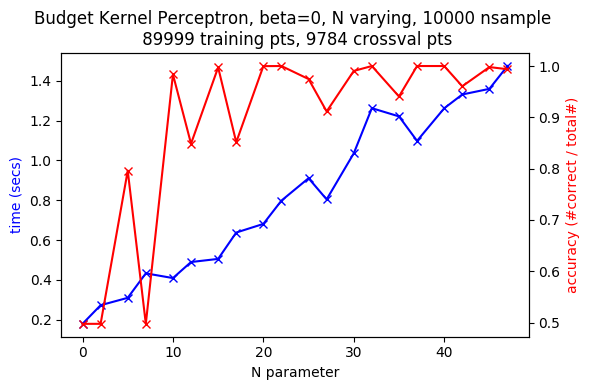

In [26]:
##############
# Calculate accuracy for BK, varying #N
##############
pts = 20
N_list = np.asarray(np.arange(0,50, (50-0)/pts), dtype=int)
times = []
accuracies = []

data = np.loadtxt("data.csv", delimiter=',')
cval_data = np.loadtxt("val.csv", delimiter=',')
X = data[:, :2]
Y = data[:, 2]
crossvalX = cval_data[:, :2]
crossvalY = cval_data[:, 2]

beta = 0
N =  100
nsample = 10000 #small for running faster
for N in N_list:
    k = BudgetKernelPerceptron(beta, N, nsample)
    k.fit(X,Y) 
    times.append(k.timefit)
    yhats = k.predict(crossvalX)
    test = [(y*y_hat>0) for y, y_hat in zip(crossvalY, yhats)]
    print('test shape',np.array(test).shape)
    print('num correct', sum(test))
    print('totaly sampes', len(Y))
    accuracy = sum([(y*y_hat>0) for y, y_hat in zip(crossvalY, yhats)]) / len(crossvalY)
    print('accuracy', accuracy)
    accuracies.append(accuracy)
#pp.savefig(aplot)
print(N_list)
print(times)
print(accuracies)

fig, ax1 = plt.subplots()
plt.xlabel("N parameter")
ax1.plot(N_list, times, linestyle='-', marker='x', color='blue')
ax1.set_ylabel("time (secs)")
ax1.yaxis.label.set_color("blue")
ax2 = ax1.twinx()
ax2.plot(N_list, accuracies, linestyle='-', marker='x', color='red')
ax2.yaxis.label.set_color("red")
ax2.set_ylabel("accuracy (#correct / total#)")
fig = plt.gcf()
fig.figsize=(5,5)
fig.dpi=100
bstr = "Budget Kernel Perceptron, beta=0, N varying, %d nsample \n %d training pts, %d crossval pts" % \
(nsample, 89999, 9784)
plt.title(bstr)
fig.tight_layout()
plt.show()

[-5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


========= *** Fitting Budget Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  0.09609293937683105  seconds.
N 100, beta -5, samples 10000, data shape 89999
=== Predicting ===
Elapsed time for predicting (9784, 2)  datapoints:  0.13905048370361328 seconds.
test shape (9784,)
num correct 4869
totaly sampes 89999
accuracy 0.4976492232215863


========= *** Fitting Budget Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  0.09128594398498535  seconds.
N 100, beta -4, samples 10000, data shape 89999
=== Predicting ===
Elapsed time for predicting (9784, 2)  datapoints:  0.15418553352355957 seconds.
test shape (9784,)
num correct 4869
totaly sampes 89999
accuracy 0.4976492232215863


========= *** Fitting Budget Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  0.10715579986572266  seconds.
N 100, beta -3, samples 10000, data shape 89999
=== Predicti

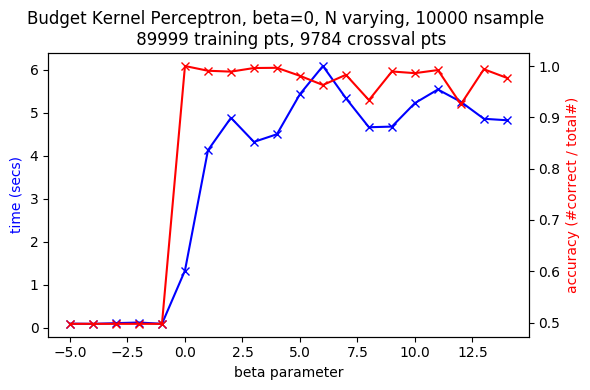

In [27]:
##############
# Calculate accuracy for BK, varying #beta
##############
pts = 20
beta_list = np.asarray(np.arange(-5,15, (15+5)/pts), dtype=int)
print(beta_list)
times = []
accuracies = []

data = np.loadtxt("data.csv", delimiter=',')
cval_data = np.loadtxt("val.csv", delimiter=',')
X = data[:, :2]
Y = data[:, 2]
crossvalX = cval_data[:, :2]
crossvalY = cval_data[:, 2]

beta = 0
N =  100
nsample = 10000 #small for running faster

for beta in beta_list:
    k = BudgetKernelPerceptron(beta, N, nsample)
    k.fit(X,Y) 
    times.append(k.timefit)
    yhats = k.predict(crossvalX)
    test = [(y*y_hat>0) for y, y_hat in zip(crossvalY, yhats)]
    print('test shape',np.array(test).shape)
    print('num correct', sum(test))
    print('totaly sampes', len(Y))
    accuracy = sum([(y*y_hat>0) for y, y_hat in zip(crossvalY, yhats)]) / len(crossvalY)
    print('accuracy', accuracy)
    accuracies.append(accuracy)
#pp.savefig(aplot)
print(np.array(nsamples_list))
print(times)
print(accuracies)

fig, ax1 = plt.subplots()
plt.xlabel("beta parameter")
ax1.plot(beta_list, times, linestyle='-', marker='x', color='blue')
ax1.set_ylabel("time (secs)")
ax1.yaxis.label.set_color("blue")
ax2 = ax1.twinx()
ax2.plot(beta_list, accuracies, linestyle='-', marker='x', color='red')
ax2.yaxis.label.set_color("red")
ax2.set_ylabel("accuracy (#correct / total#)")
fig = plt.gcf()
fig.figsize=(5,5)
fig.dpi=100
bstr = "Budget Kernel Perceptron, beta=0, N varying, %d nsample \n %d training pts, %d crossval pts" % \
(nsample, 89999, 9784)
plt.title(bstr)
fig.tight_layout()
plt.show()

In [ ]:
            # plt.xlabel('X dimension 1\n Red is class 1, Green is class -1')
            # plt.ylabel('X dimension 2')
            # plt.title(text)

# for beta in beta_list:
    # bk = BudgetKernelPerceptron(beta, N, numsamples)
    # bk.fit(X, Y)
    # print('predict time', bk.timepredict)
    # print('fit time', bk.timefit)
    # bstr = "Budget Kernel Perceptron, \n%d datapoints with %d samples, %d N, %d beta \nFit: %.02f secs" % \
            # (np.array(X).shape[0], numsamples, N, beta, bk.timefit)
# #    plt2 = bk.visualize(budget_kernel_file_name, width=0, show_charts=False, save_fig=False,
# #            include_points=True, text=bstr)
    # #plt2.savefig('budgetkernel_%dsamples_%dN_%dbeta.png' % (numsamples, N, beta))

##############